# 1. Load Packages And Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from scipy.sparse import coo_matrix

# 2.Data Loading and Preprocessing

In [2]:
df = pd.read_csv('dataset.tsv', sep='\t')

In [3]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uniq Id                          5000 non-null   object 
 1   Crawl Timestamp                  5000 non-null   object 
 2   Dataset Origin                   0 non-null      float64
 3   Product Id                       5000 non-null   object 
 4   Product Barcode                  0 non-null      float64
 5   Product Company Type Source      5000 non-null   object 
 6   Product Brand Source             139 non-null    object 
 7   Product Brand Normalised Source  139 non-null    object 
 8   Product Name Source              139 non-null    object 
 9   Match Rank                       0 non-null      float64
 10  Match Score                      0 non-null      float64
 11  Match Type                       0 non-null      float64
 12  Retailer            

In [5]:
df.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [6]:
df.shape

(5000, 32)

In [7]:
df=df[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]

In [8]:
df

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,NaN,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,NaN,NaN,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,NaN,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [9]:
df.shape

(5000, 10)

In [10]:
df.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [11]:
df['Product Rating'].fillna(0, inplace=True)
df['Product Reviews Count'].fillna(0, inplace=True)
df['Product Category'].fillna('', inplace=True)
df['Product Brand'].fillna('', inplace=True)
df['Product Description'].fillna('', inplace=True)

In [12]:
df.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,0.0,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,0.0,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [15]:
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
df.rename(columns=column_name_mapping, inplace=True)

In [16]:
df

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,0.0,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,0.0,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [17]:
df['ID'] = df['ID'].str.extract(r'(\d+)').astype(float)
df['ProdID'] = df['ProdID'].str.extract(r'(\d+)').astype(float)

In [18]:
df

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0.000000e+00,1.0,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,3.400000e+01,96.0,0.0,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,9.000000e+00,7.0,0.0,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


# 3.EDA (Exploratory Data Analysis)

In [19]:
numUser=df['ID'].nunique()
numItem=df['ProdID'].nunique()
numRating=df['Rating'].nunique()

In [20]:
print("Number of unique users are:", numUser)
print("Number of unique items are:",numItem)
print("Number of unique ratings are:",numRating)

Number of unique users are: 1721
Number of unique items are: 1697
Number of unique ratings are: 36


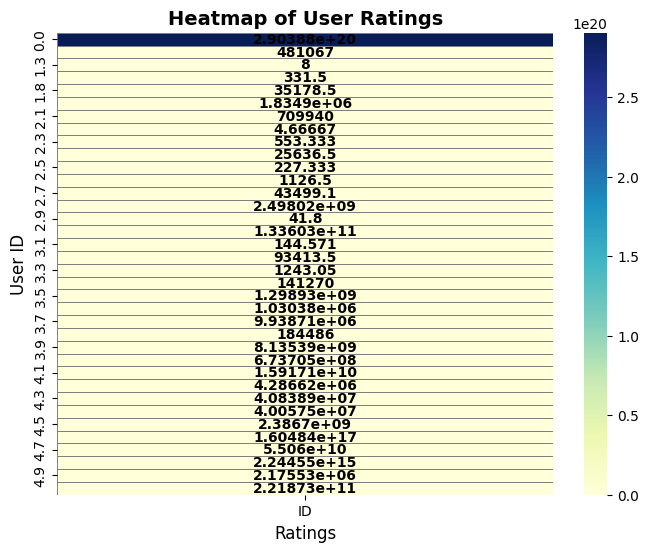

In [21]:
heatmapData = df.pivot_table('ID', 'Rating')
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmapData,
    annot=True,                       # Display the values in each cell
    fmt='g',                          # Format for the annotations
    cmap='YlGnBu',                    # Change the color palette (e.g., 'coolwarm', 'YlGnBu')
    linewidths=0.5,                   # Add lines between the cells
    linecolor='gray',                 # Set color for the lines
    cbar=True,                        # Show the color bar
    annot_kws={"size": 10, "weight": 'bold', "color": 'black'}  # Annotation customization
)
plt.title('Heatmap of User Ratings', fontsize=14, weight='bold')
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('User ID', fontsize=12)
plt.show()

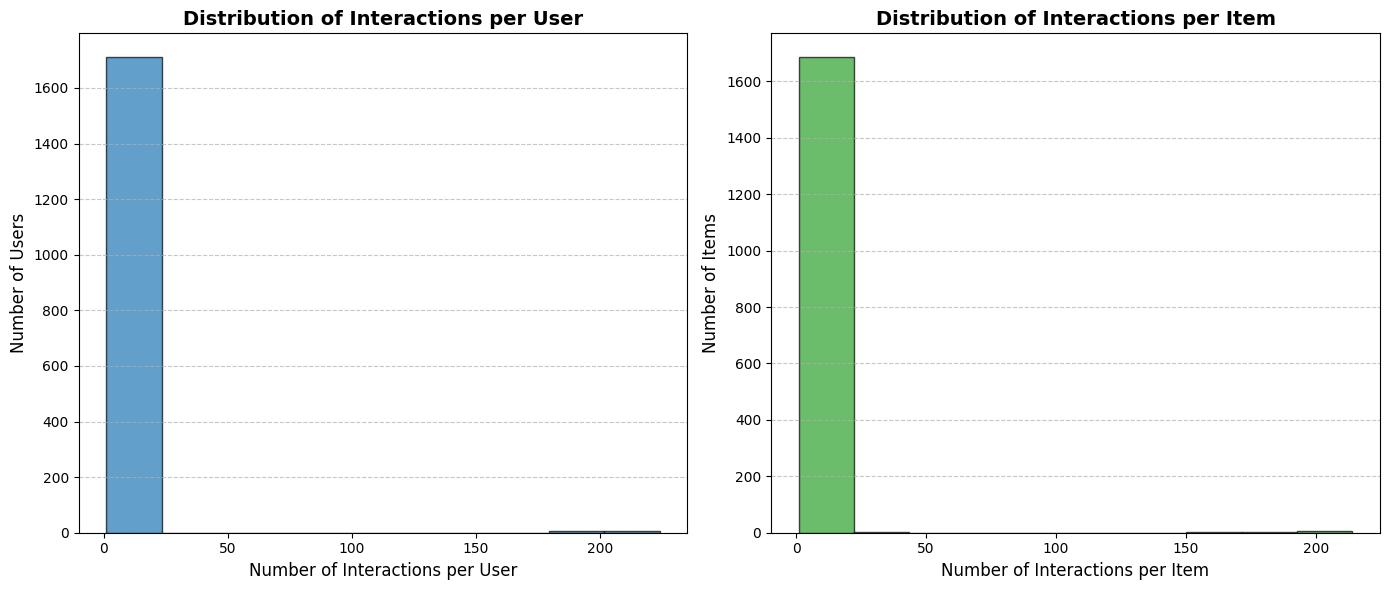

In [22]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['ID'].value_counts().plot(kind='hist', bins=10, edgecolor='black', color='#1f77b4', alpha=0.7)
plt.xlabel('Number of Interactions per User', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Distribution of Interactions per User', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
df['ProdID'].value_counts().plot(kind='hist', bins=10, edgecolor='black', color='#2ca02c', alpha=0.7)
plt.xlabel('Number of Interactions per Item', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.title('Distribution of Interactions per Item', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

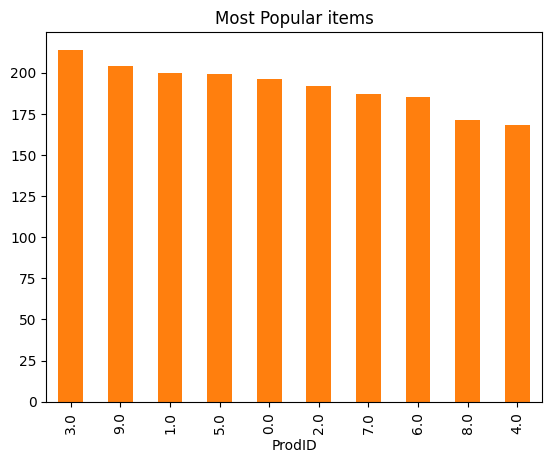

In [23]:
popularItems = df['ProdID'].value_counts().head(10)
popularItems.plot(kind='bar',color='#ff7f0e')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

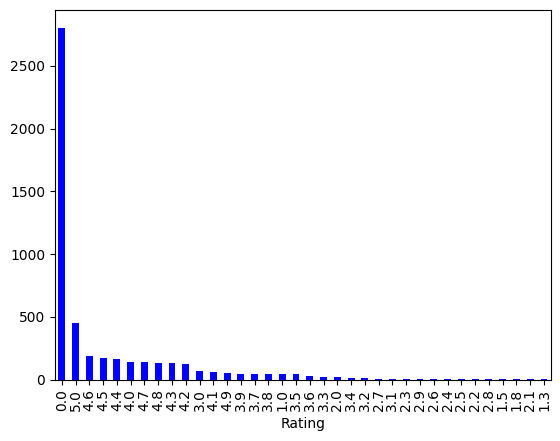

In [24]:
df['Rating'].value_counts().plot(kind='bar',color='blue')

# 4. Data Cleaning & Tags Creations

In [25]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [26]:
nlp = spacy.load("en_core_web_sm")

In [27]:
def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

In [28]:
columnsToExtractTags = ['Category', 'Brand', 'Description']

In [29]:
for column in columnsToExtractTags:
    df[column] = df[column].apply(clean_and_extract_tags)

In [30]:
df['Tags'] = df[columnsToExtractTags].apply(lambda row: ', '.join(row), axis=1)

In [31]:
df

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, lovely, blend, spearmint, lettuc...","household, essentials, air, fresheners, spray,..."
4996,0.000000e+00,1.0,3.9,7484.0,"beauty, hair, care, hair, color, permanent, ha...",garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,"garnier, nutrisse, nourishing, hair, color, cr...","beauty, hair, care, hair, color, permanent, ha..."
4997,3.400000e+01,96.0,0.0,4.0,"beauty, makeup, nails",stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,"multifunctional, nail, drill, kit, come, 6, di...","beauty, makeup, nails, stoneway, multifunction..."
4998,9.000000e+00,7.0,0.0,0.0,"premium, beauty, premium, bath, body, premium,...",creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,"premium, beauty, premium, bath, body, premium,..."


# 5.Recommendation System
## i. Rating Based Recommendation

In [32]:
averageRating=df.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [33]:
topRatedItems=averageRating.sort_values(by='Rating',ascending=False)
ratingBaseRecommendation=topRatedItems.head(10)

In [34]:
ratingBaseRecommendation

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4.0,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5.0
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2.0,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5.0
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2.0,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5.0
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24.0,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5.0
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2.0,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1.0,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5.0
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1.0,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5.0
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4.0,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5.0
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12.0,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5.0
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1.0,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0


In [35]:
ratingBaseRecommendation=ratingBaseRecommendation.copy()
ratingBaseRecommendation['Rating'] = ratingBaseRecommendation['Rating'].astype(int)
ratingBaseRecommendation['ReviewCount'] = ratingBaseRecommendation['ReviewCount'].astype(int)

In [36]:
print("Rating Base Recommendation System: (Trending Products)")
ratingBaseRecommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = ratingBaseRecommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
ratingBaseRecommendation

Rating Base Recommendation System: (Trending Products)


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


## ii.Attribute-Driven Recommendation System

In [37]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [38]:
itemName = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
itemIndex = df[df['Name']==itemName].index[0]

In [39]:
similarItems = list(enumerate(cosine_similarities_content[itemIndex]))

In [40]:
similarItems = sorted(similarItems, key=lambda x:x[1], reverse=True)
topSimilarItems = similarItems[1:10]
recommendedItemsIndics = [x[0] for x in topSimilarItems]

In [41]:
df.iloc[recommendedItemsIndics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


In [42]:
#Function To Recommend Products for Content Base
def content_based_recommendations(train_data, item_name, top_n=10):
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
    item_index = train_data[train_data['Name'] == item_name].index[0]
    similar_items = list(enumerate(cosine_similarities_content[item_index]))
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    top_similar_items = similar_items[1:top_n+1]
    recommended_item_indices = [x[0] for x in top_similar_items]
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
    return recommended_items_details

In [43]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(df, item_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [44]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(df, item_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


# iii. User Preference Based Collaborative Filtering

In [45]:
userItemMatrix = df.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [46]:
userSimilarity = cosine_similarity(userItemMatrix)

In [47]:
targetUserId = 4
targetUserIndex = userItemMatrix.index.get_loc(targetUserId)

In [48]:
userSimilarities = userSimilarity[targetUserIndex]
similarUserIndices = userSimilarities.argsort()[::-1][1:]

In [49]:
recommend_items = []
for user_index in similarUserIndices:
    rated_by_similar_user = userItemMatrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (userItemMatrix.iloc[targetUserIndex]==0)
    recommend_items.extend(userItemMatrix.columns[not_rated_by_target_user][:10])

recommended_items_details = df[df['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [50]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


In [51]:
#Function That Recommend Items
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)
    user_similarity = cosine_similarity(user_item_matrix)
    target_user_index = user_item_matrix.index.get_loc(target_user_id)
    user_similarities = user_similarity[target_user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]
    recommended_items = []
    for user_index in similar_users_indices:
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])
    recommended_items_details = df[df['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
    return recommended_items_details.head(10)
target_user_id = 5
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id)
print("Top recommendations for User for target User",target_user_id ," is:")
collaborative_filtering_rec

Top recommendations for User for target User 5  is:


,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,opi,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
40,"Pantene Pro-V Repairing Mask Treatment, Gold S...",176.0,pantene,https://i5.walmartimages.com/asr/fbd2ba15-5051...,4.1
42,Medline Aloetouch PROTECT Dimethicone Skin Pro...,1.0,medline,https://i5.walmartimages.com/asr/ac8c39d4-4241...,2.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
70,LOreal Paris Colorista Semi-Permanent Hair Col...,1860.0,paris,https://i5.walmartimages.com/asr/a0992a6b-09d3...,0.0
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
110,"NOW Foods 100% Pure Eucalyptus Oil, 2 Fl Oz",23.0,,https://i5.walmartimages.com/asr/e20a3058-4657...,0.0
117,Coppertone Sport Sunscreen SPF 50 3 oz,0.0,coppertone,https://i5.walmartimages.com/asr/3da0339c-28ca...,0.0
139,"LOreal Paris Colour Riche Glossy Balm, Innocen...",41.0,paris,https://i5.walmartimages.com/asr/a313e50a-5f82...,4.0


# iv. Combined Recommendation Engine

In [52]:
def hybrid_recommendations(df,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(df,item_name, top_n)
    collaborative_filtering_rec = collaborative_filtering_recommendations(df,target_user_id, top_n)
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    return hybrid_rec.head(10)

In [53]:
target_user_id = 4 
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11" 
hybrid_rec = hybrid_recommendations(df,target_user_id, item_name, top_n=10)
print("Top recommendations for User for target User", target_user_id, "and Item", item_name, "is:")
hybrid_rec

Top recommendations for User for target User 4 and Item OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11 is:


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [54]:
target_user_id = 10 
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
hybrid_rec = hybrid_recommendations(df,target_user_id, item_name, top_n=10)
print("Top recommendations for User for target User", target_user_id, "and Item", item_name, "is:")
hybrid_rec

Top recommendations for User for target User 10 and Item Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum is:


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0


## V.Intelligent Fuzzy-Neural Recommender 

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
from fuzzywuzzy import fuzz
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
scaler = MinMaxScaler()
df = pd.read_csv('dataset.tsv', sep='\t', encoding='utf-8')

In [57]:
numeric_columns = ['Product Price', 'Product Rating', 'Product Reviews Count']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
numerical_features = df[numeric_columns].fillna(0)
numerical_features_scaled = scaler.fit_transform(numerical_features)


In [58]:
# Build and train neural network model
input_dim = numerical_features_scaled.shape[1]
inputs = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(input_dim, activation='relu')(x)
neural_model = Model(inputs=inputs, outputs=outputs)
neural_model.compile(optimizer='adam', loss='mse')
neural_model.fit(numerical_features_scaled, numerical_features_scaled, epochs=10, batch_size=32, verbose=0)

In [59]:
def fuzzy_similarity(item1, item2):
    name_sim = fuzz.ratio(str(item1['Product Name']), str(item2['Product Name'])) / 100
    brand_sim = fuzz.ratio(str(item1['Product Brand']), str(item2['Product Brand'])) / 100
    try:
        price_diff = abs(float(item1['Product Price']) - float(item2['Product Price']))
    except (ValueError, TypeError):
        price_diff = 0
    price_sim = 1 / (1 + price_diff / 100)
    return 0.4 * name_sim + 0.3 * brand_sim + 0.3 * price_sim

In [60]:
def hybrid_recommendations(df, target_user_id, item_name, top_n=10):
    # Find the target item by name
    target_item = df[df['Product Name'].str.contains(item_name, case=False, na=False)]
    
    if target_item.empty:
        print(f"No item found with name: {item_name}")
        return pd.DataFrame()  # Return empty DataFrame if no item is found

    target_item = target_item.iloc[0]  # Take the first match if multiple found
    neural_embeddings = neural_model.predict(numerical_features_scaled, verbose=0)
    
    similarities = []
    for idx, row in df.iterrows():
        if row['Uniq Id'] != target_item['Uniq Id']:
            neural_sim = cosine_similarity([neural_embeddings[idx]], [neural_embeddings[df[df['Uniq Id'] == target_item['Uniq Id']].index[0]]])[0][0]
            fuzzy_sim = fuzzy_similarity(target_item, row)
            hybrid_sim = 0.6 * neural_sim + 0.4 * fuzzy_sim
            similarities.append((row['Uniq Id'], hybrid_sim, row))

    similarities.sort(key=lambda x: x[1], reverse=True)
    recommendations = similarities[:top_n]

    # Create a DataFrame for recommended products in the specified format
    recommendation_data = []
    for _, similarity, item in recommendations:
        recommendation_data.append({
            "Name": item['Product Name'][:50] + "..." if len(str(item['Product Name'])) > 50 else item['Product Name'],
        })

    recommendation_df = pd.DataFrame(recommendation_data)
    return recommendation_df

In [61]:
# Usage example
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
target_user_id = 1  # Replace with the actual user ID as needed
hybrid_rec = hybrid_recommendations(df, target_user_id, item_name, top_n=10)

print("Top recommendations for User", target_user_id, "and Item", item_name, "is:")
print(hybrid_rec)

Top recommendations for User 1 and Item Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum is:
                                                Name
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1  Nice n Easy Permanent Color, 111 Natural Mediu...
2  Clairol Nice N Easy Permanent Color 7/106A Nat...
3  Kokie Professional Matte Lipstick, Hot Berry, ...
4  Gillette TRAC II Plus Razor Blade Refills, Fit...
5  Old Spice Artisan Styling High Hold Matte Fini...
6  Colgate My First Baby and Toddler Toothpaste, ...
7  BMC Bright and Loud Cream Gel Lacquer Polish S...
8  Suave Extra Hold 7 Shaping Mousse 9 oz (Pack o...
9  (3 pack) Vaseline Lip Therapy Tinted Lip Balm ...


In [62]:
item_name = 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11'
target_user_id = 1  # Replace with the actual user ID as needed
hybrid_rec = hybrid_recommendations(df, target_user_id, item_name, top_n=10)
print("Top recommendations for User", target_user_id, "and Item", item_name, "is:")
print(hybrid_rec)

Top recommendations for User 1 and Item OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11 is:
                                                Name
0  OPI Nail Lacquer - Dont Bossa Nova Me Around -...
1          OPI Nail Polish, Big Apple Red, 0.5 fl oz
2  OPI Infinite Shine, Nail Lacquer Nail Polish, ...
3  OPI Nail GelColor + Infinite Shine Polish - PR...
4  ORLY Nail Lacquer for Women, #20634 Red Carpet...
5  LOreal Paris Colorista Semi-Permanent Hair Col...
6  Floral Set of 6 Fragrance Oils - Premium Grade...
7  ($29.50 Value) CHI Silk Infusion Reconstructin...
8  COVERGIRL Exhibitionist Cream Lipstick, 395 Da...
9      Now Foods - 1 fl oz Spearmint Oil (Pack of 2)
